<a href="https://colab.research.google.com/github/vianeyBE/DiplomadoMLDS/blob/main/Proyecto_Base_de_datos_de_pacienyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Aplicado: analisis exploratorio y visualizacion de un conjunto de datos de pacientes con tumores mamarios

Link video:
https://www.loom.com/share/d5b040d6502b44b89b0c00a70f72d451

*Nombre: Vianey Paola Barrera Enriquez*

El presente *dataset* se compone de distintas variables que caracterizan los tumores mamarios de diferentes pacientes. Estos tumores podrian ser benignos o malignos. Esta base de datos pertenece al profesor Dr. William H. Wolber de la universidad de Wisconsin.

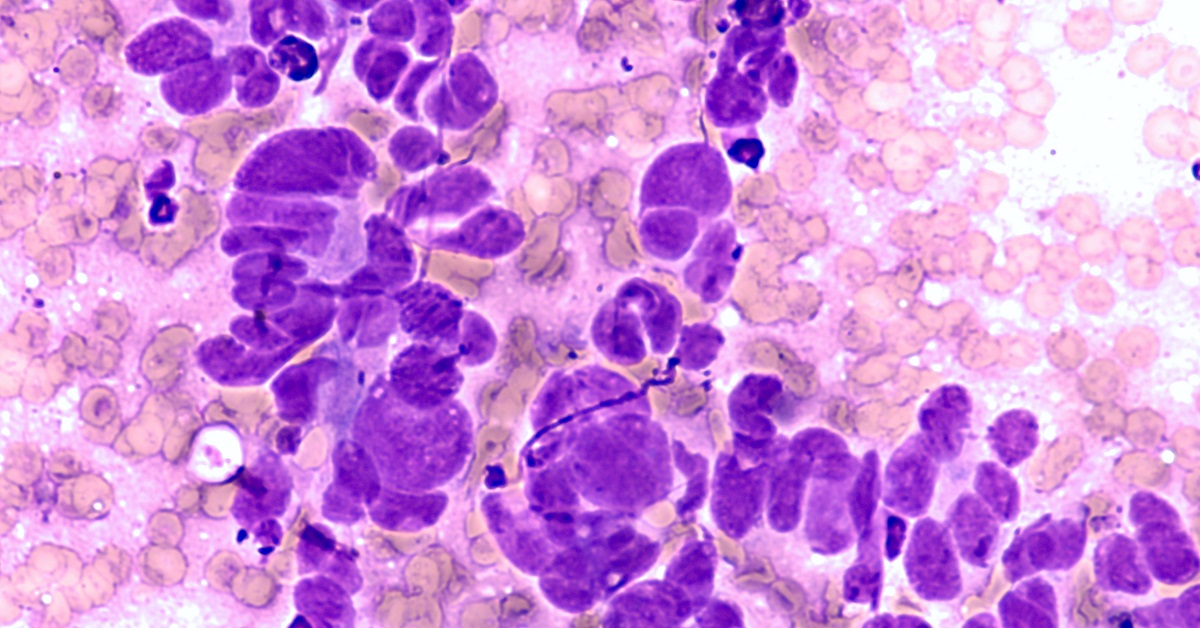

En el presente proyecto se busca identificar por medio de distinas herramientas que variables son mas relevantes para determinar sin un tumor mamario es maligno o benigno. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cancer = pd.read_csv("breastCancer.txt", sep='\t')

In [ ]:
cancer['class'].replace({2:0, 4:1}, inplace=True)

In [ ]:
cancer.sample(5)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
231,1231387,6,8,7,5,6,8.0,8,9,2,1
679,1368882,2,1,1,1,2,1.0,1,1,1,0
554,1313658,3,1,1,1,2,1.0,1,1,1,0
541,1171578,3,1,1,1,2,1.0,1,1,1,0
562,1328331,1,1,1,1,2,1.0,3,1,1,0


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 699 non-null    int64  
 1   clump_thickness    699 non-null    int64  
 2   size_uniformity    699 non-null    int64  
 3   shape_uniformity   699 non-null    int64  
 4   marginal_adhesion  699 non-null    int64  
 5   epithelial_size    699 non-null    int64  
 6   bare_nucleoli      683 non-null    float64
 7   bland_chromatin    699 non-null    int64  
 8   normal_nucleoli    699 non-null    int64  
 9   mitoses            699 non-null    int64  
 10  class              699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Se puede observar que este *dataset* se compone de 10 variables y 699 observaciones. La unica variable con valores nulos es *bare_nucleoli*, la cual tiene 16 valos *NaN*

Todas las variables se tratan de variables numericas discretas en un escala de 1 a 10. A continuación se procede a explicar su significado:  

- *id*: identificación del pacientes
- *clump_thinckness*: grosor de la agrupación. Las célular beningnas tienden a acumularse en monocapa, mientras que las células cancerosas suelen organizarse en multicapas.
- *size_uniformity*: uniformidad del tamaño. Las células en tumores malignos tienden a tener diferentes tamaños.  
- *shape_uniformity*: uniformidad de la forma. Las células en tumores malignos suelen adoptar formas distintas.
- *marginal_adhesion*: adhesion marginal. Las células sanas tienden a mantener la unidad, por lo que mantienen la adhesion con las celulas vecinas.
- *epithelial_size*: tamaño del epitelio. Esta variable esta relacionada con la uniformidad, celulas epiteliales con tamaños anomalos se asocian a células malignas.
- *bare_nucleoli*: es un nucleo celular desnudo, es decir sin citoplasma. Este fenomeno se suele observar en tumores benignos. 
- *bland_chromatin*: variable usada para describir la uniformidad del nucleo
- *normal_nucleoli*: nucleolos (*nucleoli*) son pequeñas estructuras del núcleo célular. En células cancerigenas estas estructuras se vuelven mas prominentes y algunas veces hay mas de uno presente, esta variable determina el grado de normalidad/anormalidad de esta estructura. 
- *mitosis*: mitosis, mide el grado de normalidad/anormalidad en el proceso de mitosis. Cancer es basicamente una enfermedad de mitosis descontrolada. 
- *class*: el valor 0 representa un tumor benigno y el 1 un tumor maligno

Procedemos a calcular estadisticas descriptivas y obtener las distribuciones:

In [ ]:
cancer.describe().drop(columns=['id'])

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec0d1b10>,
      dtype=object)

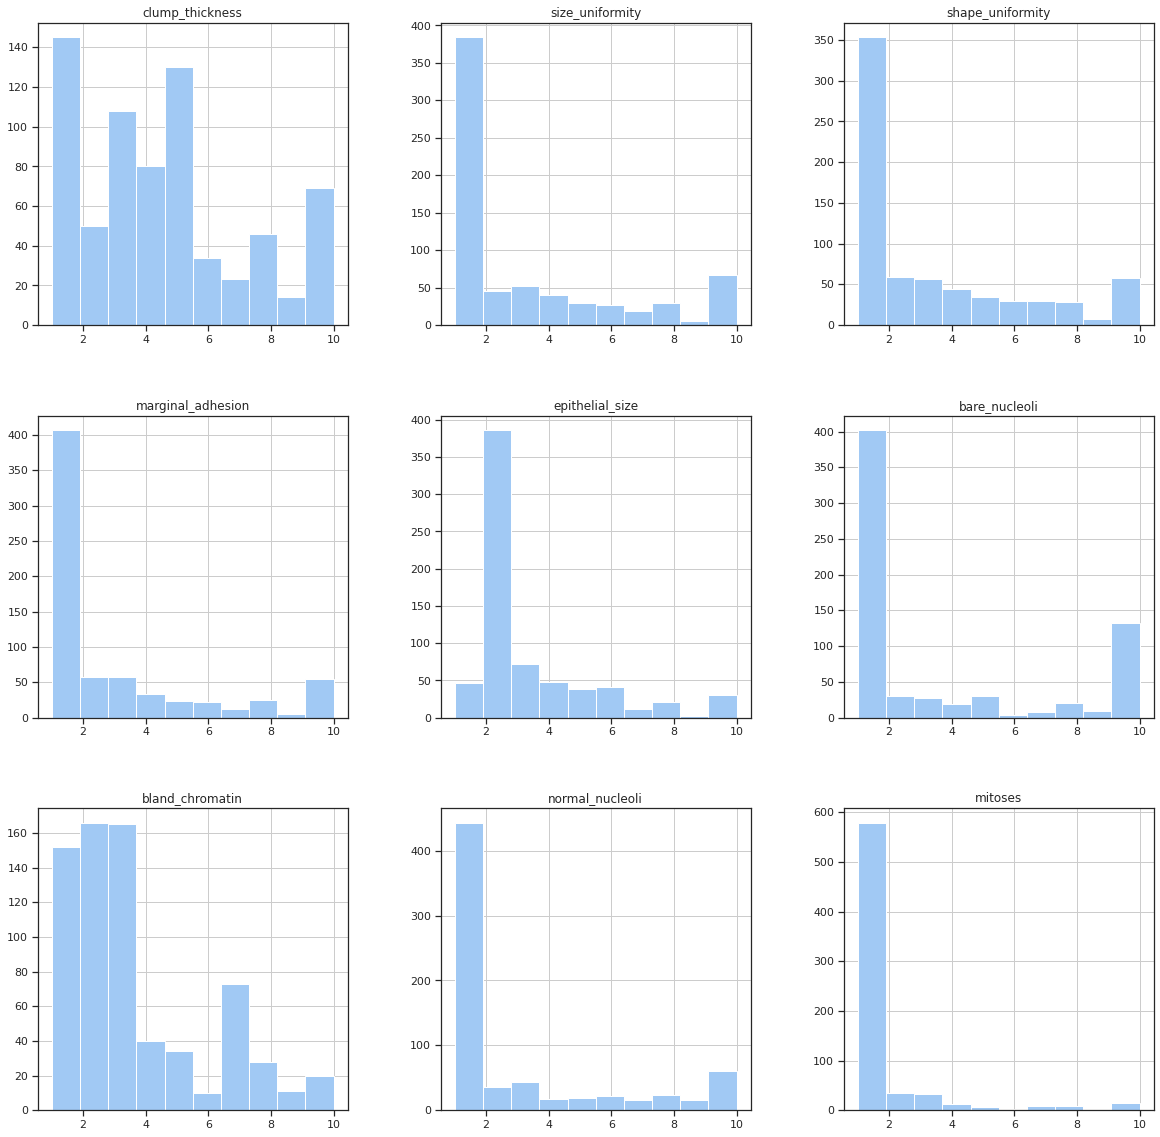

In [ ]:
cancer.iloc[:,1:10].hist(bins=10,figsize=(20,20))

Examinemos los conteos de la variable *class*:

In [ ]:
cancer['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

Esto nos indica que tenemos 458 pacientes con tumores mamarios benignos y 241 pacientes con tumores malignos. 

Examinemos nuevamente la media de variables agrupando las pacientes de acuerdo a la variable *class*:

In [ ]:
cancer.groupby('class').mean().drop(columns=['id']).T

class,0,1
clump_thickness,2.956332,7.195021
size_uniformity,1.325328,6.572614
shape_uniformity,1.443231,6.560166
marginal_adhesion,1.364629,5.547718
epithelial_size,2.120087,5.298755
bare_nucleoli,1.346847,7.627615
bland_chromatin,2.100437,5.979253
normal_nucleoli,1.290393,5.863071
mitoses,1.063319,2.589212


Los resultados nos indican que existen diferencias importantes en los niveles de todas las variables, a excepcion de la variable *mitoses*, la cual en las pacientes con tumores benignos la media tiene un valor de 1.06 y en aquellas pacientes con tumores malignos la media toma una valor de 2.59.

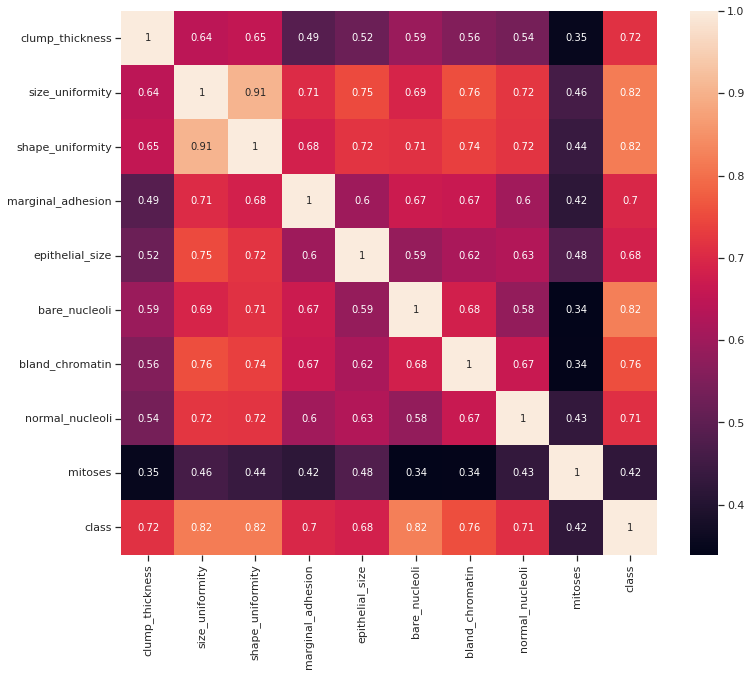

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,10))
correlation_mat = cancer.iloc[:,1:].corr()
sns.heatmap(correlation_mat, annot = True)

La matriz de correlaciones nos indica valores altos de correlacion para la mayor parte de variables. Ya que buscamos entender como las variables determinan el resultado de tumor maligno o benigno (*class*), veamos más a fondo los valores de correlacion obtenidos para el resto de variables con respecto a *class*

- El valor más alto es con las variables *size_uniformity*, *shape_uniformity* y *bare_nucleoli* sugiriendo que estas variables pueden ser las mas importantes para predecir si un tumor es maligno o no. 
- El valor más bajo es con la variable *mitoses*, esto ya lo habiamos observado en las medias, donde no se ve gran diferencia en los valores entre ambos grupos. 

Ahora procedemos a gráficar las diferencias y evaluar si existen diferencias significativas en cada una de las variables para ambos tipos de tumores. El siguiente boxplot nos ayudara a identificar las diferencias visualmente:

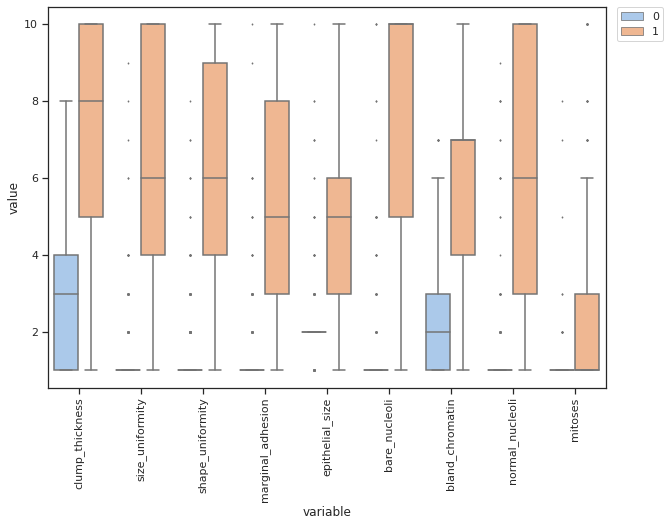

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.set_theme(style="ticks", palette="pastel")
ax= sns.boxplot(x="variable", y="value", hue='class', data=pd.melt(cancer.iloc[:,1:],id_vars=["class"]),
                flierprops = dict(markerfacecolor = '0.50', markersize = 1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Para todas la variables existen importantes diferencias en su distribucion. Para evaluar su significancia emplearemos la **prueba z** en la media de los dos grupos.

In [ ]:
for var in cancer.columns.tolist():
  if var not in ['id', 'class']:
    print('Variable: ', var)
    grupo1=cancer[cancer['class']==0][var].dropna()
    grupo2=cancer[cancer['class']==1][var].dropna()

    z_score, p_valor = sm.stats.ztest(grupo1, grupo2,
                                      value=0, alternative='two-sided')

    print(f"Estadístico: {z_score}\np-valor: {p_valor}")
    if p_valor <= 0.05:
      print("La diferencia entre las medias de ambos grupos es significativa\n")
    else:
      print("No hay diferencia significativa entre las medias de ambos grupos\n")

Variable:  clump_thickness
Estadístico: -27.07779493262112
p-valor: 1.7983078583099597e-161
La diferencia entre las medias de ambos grupos es significativa

Variable:  size_uniformity
Estadístico: -37.53035055511016
p-valor: 2.947484914391008e-308
La diferencia entre las medias de ambos grupos es significativa

Variable:  shape_uniformity
Estadístico: -37.67367157742386
p-valor: 1.3406540564388e-310
La diferencia entre las medias de ambos grupos es significativa

Variable:  marginal_adhesion
Estadístico: -25.64748914780428
p-valor: 4.5097294450614864e-145
La diferencia entre las medias de ambos grupos es significativa

Variable:  epithelial_size
Estadístico: -24.672242609603206
p-valor: 2.124461767703612e-134
La diferencia entre las medias de ambos grupos es significativa

Variable:  bare_nucleoli
Estadístico: -37.765596377352686
p-valor: 0.0
La diferencia entre las medias de ambos grupos es significativa

Variable:  bland_chromatin
Estadístico: -30.549751172170236
p-valor: 5.697794689

Como se puede ver en los resultados anteriores, la diferencia en las medias entre ambos grupos para todas las variables resultaron siendo significativas. Teniendo en cuenta eso, usaremos todas la variables para realizar un regresion logistica que sea capaz de modelar la probabilidad de ocurrencia de que un tumor sea o no maligno. 

In [ ]:
model = sm.GLM.from_formula(' Q("class") ~ clump_thickness + size_uniformity + shape_uniformity + marginal_adhesion  +  epithelial_size +  bare_nucleoli + bland_chromatin +  normal_nucleoli  +  mitoses',  
                            data=cancer, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Q("class")   No. Observations:                  683
Model:                            GLM   Df Residuals:                      673
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51.444
Date:                Sun, 26 Sep 2021   Deviance:                       102.89
Time:                        02:33:43   Pearson chi2:                     592.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.1039      1.175     -8.600      0.000     -12.407      -7.801
clump_thickness       0.5350      0.142      3.767      0.000       0.257       0.813
size_uniformity      -0.0063      0.209     -0.030      0.976      -0.416       0.404
shape_uniformity      0.3227      0.231      1.399      0.162      -0.129       0.775
marginal_adhesion     0.3306      0.123      2.678      0.007       0.089       0.573
epithelial_size       0.0966      0.157      0.617      0.537      -0.210       0.404
bare_nucleoli         0.3830      0.094      4.082      0.000       0.199       0.567
bland_chromatin       0.4472      0.171      2.609      0.009       0.111       0.783
normal_nucleoli       0.2130      0.113      1.887      0.059      -0.008       0.434
mitoses               0.5348      0.329      1.627      0.104      -0.110       1.179
=====================================================================================
"""

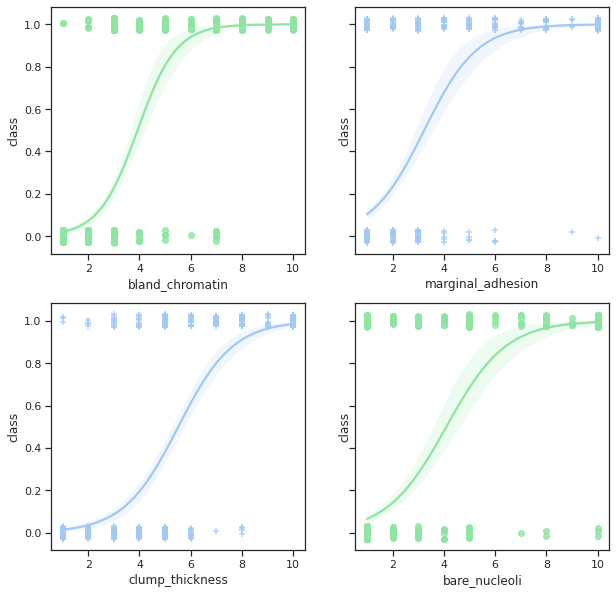

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

sns.regplot(ax=axes[0, 0], y="class", x="bland_chromatin", data=cancer, logistic=True, y_jitter=.03, color="g")

sns.regplot(ax=axes[0, 1], y="class", x="marginal_adhesion", data=cancer, logistic=True, y_jitter=.03, marker="+")

sns.regplot(ax=axes[1, 0], y="class", x="clump_thickness", data=cancer, logistic=True, y_jitter=.03, marker="+")

sns.regplot(ax=axes[1, 1], y="class", x="bare_nucleoli", data=cancer, logistic=True, y_jitter=.03, color="g")